# Тестирование статистических гипотез

<b>В рамках данной работы будут затронуты и выполнены задания, связанные с предобработкой данных, постановкой и проверкой статистических гипотез, изучением распределений признаков и аппроксимацией. 
</b>

Импортируем необходимые библиотеки:

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
from scipy import stats as st
from scipy.stats import norm
import statsmodels as sm
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from statsmodels import api 


sns.set_style('darkgrid')
plt.style.use('bmh')


import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.weightstats import ztest as ztest


In [115]:
#Будет затронуто три датасета, информация по каждому будет описана в соответствующих пунктах в дальнейшем.
#Заранее открою и присвою все файлы:

cc = pd.read_csv('cookie_cats.csv') #Задача 2, 
bcs = pd.read_csv('banner_click_stat.csv', sep='\t') #
po = pd.read_csv('pokemon.csv') 

------------

## Задача 1. 

"В период с 2008 по 2010 год в Германии жил Осьминог Пауль, который был известен тем, что мог предсказывать результаты матчей с участием сборной Германии."    
   
В таблице ниже вы можете видеть результаты его предсказаний: 


<a href="https://ibb.co/VWnc5yG"><img src="https://i.ibb.co/QFS3tBV/image.jpg" alt="image" border="0"></a>

Если считать, что случайным образом мы угадывали бы 50% матчей, то можно ли утверждать, что осьминог Пауль был талантливым экстрасенсом со способностями к предсказаниям?

В задаче нас интересует гипотеза о доле с распределением бернулиевских случайных величин, соответственно стоит использовать либо Ztest о доле, либо Биноминальный тест. 

Поскольку выборка состоит из всего 13 наблюдений, где p = 1/2 (вероятность выбора победы или поражения), то нулевое распределение статистики таково: T~Bin(13, 0.5).

<b> Н0: Осьминог Пауль угадывает, НЕ имея никаких экстрасенсорных способностей. </b>

<b> Н1: Осьминог Пауль угадывает, имея экстрасенсорные способности. </b>

In [4]:

n = 13
st.binom_test(11, n, 0.5, alternative = 'greater') # 11 матчей Пауль угадал.


0.01123046875


Выбор альтернативы 'greater' означает, что надо угадать 11 раз из 13. (Как и сделал осьминог Пауль).

Полученное значение(p-value) = 0.01123046875, т.е. ~1.1%, значит, что: 
1. На уровнях статистической значимости 5%, 10%, <b>нулевая гипотеза отвергается в пользу альтернативной H1</b>; 
2. На уровне статистической значимости 1%, <b>нулевая гипотеза НЕ отвергается</b>; (т.к. p-value ∈ (1%; 5%)).


Значит, при 5% или 10% стат. значимости и по имеющимся данным можно сказать, что Пауль - экстрасенс (Н1). 

А при 1% стат. значимости, нельзя сказать, что осьминог Пауль - экстрасенс, как и нельзя точно сказать, что никаких способностей у него нет, просто в рамках данных наблюдений при таком уровне значимости, подтвердить навыки прогнозирования не удастся.


------------

## Задача 2.  

Новый корм для котов рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше.

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в табличке.

Можно ли утверждать, что оба баннера одинаково хороши? Сформулируйте статистическую гипотезу для проверки того, что оба баннера выбирают одинаково часто. Проверьте ее и сделайте выводы.


In [5]:
#bcs.info() 
#bcs.isnull().sum() # на всякий случай, проверим на наличие пропусков; (их не оказалось);
bcs

,0,0.1
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
994,0,0
995,0,0
996,0,0
997,0,0


In [6]:
bcs = bcs.rename(columns={'0': '1st_Banner', '0.1': '2nd_Banner'}) #Переименуем для удобства
bcs.head(15)

,1st_Banner,2nd_Banner
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [7]:
bcs['1st_Banner'].value_counts()

0    962
1     37
Name: 1st_Banner, dtype: int64

In [8]:
bcs['2nd_Banner'].value_counts()

0    946
1     53
Name: 2nd_Banner, dtype: int64

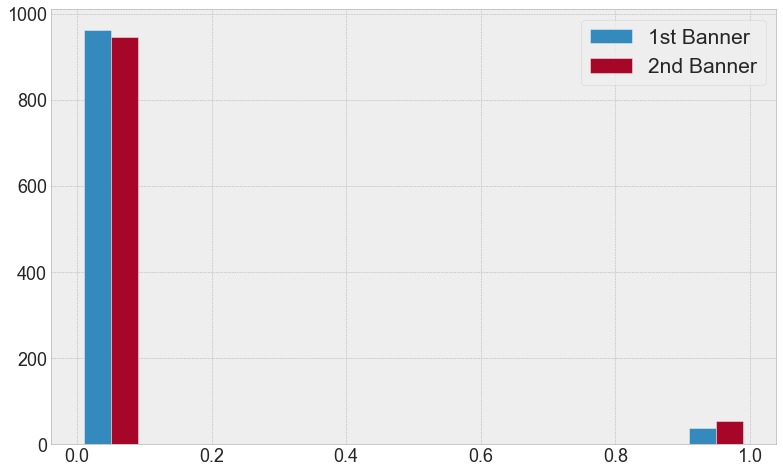

In [9]:

plt.figure(figsize=(13,8))
plt.rcParams['font.size'] = 18
plt.hist(bcs, label=['1st Banner', '2nd Banner'])
plt.legend(loc=1, prop={'size': 21})




В данной задаче наблюдается бернулиевское распределение величин на двух больших(999 набл.) выборках, с имеющимся дисбалансом значений (нулей значительно больше, чем единиц), где требуется проверить гипотезу о доли симпатий к одному банеру и другому, при условии, что выборки независимы. 

С учетом всего вышесказанного, будет использоваться proportions_ztest(). 
(Тестирование предполагает сравнение долей двух выборок).

<b> Н0: b2 = b1. </b> (b1 - старый банер, b2 - новый); Оба банера одинаково хороши.

<b> Н1: b2 != b1. </b> Один банер лучше другого.


In [10]:
# Кол-во "успехов" == кол-ву лайков, что было посчитано выше, методом value_counts()

proportions_ztest([53, 37], [999, 999], alternative='two-sided')


(1.7258668408081945, 0.08437137142549557)


Полученное p-value = 0.08437137142549557, т.е. ~8.4%. Поскольку это значение лежит в интервале (5%; 10%), то:

1. На уровне статистической значимости 10%, <b>нулевая гипотеза (Н0) отвергается в пользу альтернативной (Н1)</b>;
Значит, что при стат. значимости 10% и при имеющихся результатах наблюдений, один банер лучше другого. 

2. На уровне статистической значимости 1% или 5%, <b>нулевая гипотеза не отвергается</b>; 
Значит, что на основе данных отзывов и уровнях стат. значимости 1% или 5%, нельзя сказать, что банеры отличаются друг от друга, (как и нельзя сказать, что разницы между ними точно нет). 


------------

## Задача 3.
## Игра Cookie Cats

В этом задании мы поработаем с данными Cookie Cats - популярной игры-головоломки, которую разработала компания Tactile Entertainment. В этой игре игрок должен соединять одинаковые элементы в ряд, чтобы очистить поле и выиграть уровень. https://apps.apple.com/ru/app/cookie-cats/id1078297893

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


По мере прохождения уровней перед игроками появляются ворота, открытия которых нужно ждать какое-то время или пропускать их, совершая покупки в приложении. С точки зрения создателей эти ворота повышают интерес к игре и стимулируют к вложению денег в игру.


Но у создателей появляется важный вопрос: **где лучше всего ставить ворота?**
Первоначально первые ворота были размещены на уровне 30. Однако есть гипотеза, что лучше переместить их на уровень 40. В этом задании предлагается проанализировать результаты AB-теста, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - вернулся ли игрок в игру через 1 день после установки
* `retention_7` - вернулся ли игрок в игру через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [11]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [12]:
cc.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [13]:
cc.isnull().sum() #проверка на пропуски (их не оказалось).

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [14]:
cc.duplicated().sum() #проверка на дубликаты

0

Прежде всего, с т.ч. задания, нужно удалить тех игроков, которые не дошли до этих самых ворот. Т.е. не прошли 30 уровней, при воротах на 30ур., и не прошли 40 уровней при воротах на 40ур. Таких игроков важно удалить, тк они в рамках задачи нерепрезентативны.

In [15]:

cc1 = cc.loc[((cc.version == 'gate_30') & (cc.sum_gamerounds >= 30)) | ((cc.version == 'gate_40') & (cc.sum_gamerounds >= 40))]

cc1 #Теперь мы избавились от тех игроков, которые даже не успели увидеть ворот.


,userid,version,sum_gamerounds,retention_1,retention_7
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
...,...,...,...,...,...
90171,9997757,gate_30,84,True,False
90175,9998125,gate_30,30,False,False
90177,9998376,gate_40,53,False,False
90184,9999441,gate_40,97,True,False


### Вопрос 1: есть ли зависимость между возвращаемостью игроков и расположением ворот?

#### 1.1 Проверим гипотезу для возвращения через день

In [16]:
cc1.retention_1.value_counts() #проверка на кол-во False(5663) и True(24820);

True     24820
False     5663
Name: retention_1, dtype: int64


В задаче требуется рассмотреть зависимость/независимость категориальных признаков, т.е. следует использовать Критерий независимости хи-квадрат Пирсона.

<b> => команда stats.chi2_contingency(X, correction=False). </b> 

Сформулируем гипотезы:

<b> Н0: Кол-во людей, вернувшихся через день, не зависит от расположения ворот. </b> 

<b> Н1: Кол-во людей, вернувшихся через день, зависит от расположения ворот. </b>



In [17]:


sc.stats.chi2_contingency(cc1.groupby('version')['retention_1'].value_counts().unstack(), correction=False) 



(42.62954254122583,
 6.615268090521592e-11,
 1,
 array([[ 3094.27969688, 13561.72030312],
        [ 2568.72030312, 11258.27969688]]))


P-value = 6.615268090521592e-11, т.е. это ~6.615268090521592e-9%. 
Значит, что <b> на всех разумных уровнях значимости нулевая гипотеза (Н0) отвергается в пользу альтернативной гипотезы (Н1).</b> Т.к. (p.value < 1%).

Т.е. зависимость между категориальными переменными есть, т.е. расположение ворот влияет на возвращаемость аудитории через день.



#### 1.2 Проверьте гипотезу для возвращения через семь дней

Тут нужно будет повторить тоже самое, что и сверху, только с другой переменной, поэтому не буду объяснять выбор теста и тд.

Сформулируем гипотезы:

<b> Н0: Кол-во людей, вернувшихся через 7 дней, не зависит от расположения ворот. </b> 

<b> Н1: Кол-во людей, вернувшихся через 7 дней, зависит от расположения ворот. </b>


In [18]:

sc.stats.chi2_contingency(cc1.groupby('version')['retention_7'].value_counts().unstack(), correction=False)



(65.21860928016119,
 6.70335137773422e-16,
 1,
 array([[8998.16317292, 7657.83682708],
        [7469.83682708, 6357.16317292]]))


P-value = 6.70335137773422e-16, т.е. ~6.70335137773422e-14%. 
Значит, что <b> на всех разумных уровнях значимости нулевая гипотеза (Н0) отвергается в пользу альтернативной гипотезы (Н1).</b> Т.к. (p.value < 1%). 

Т.е. зависимость между категориальными переменными есть, т.е. расположение ворот влияет на возвращаемость аудитории через 7 дней.


### Вопрос 2: Отличается ли среднее количество раундов в группах gate_40 и gate_30?

In [19]:
cc.shape #Кол-во наблюдений = 90189 (большая выборка)

(90189, 5)

In [20]:
cc = cc.drop_duplicates(subset='userid')
cc.shape #Проверю не встречаются ли некоторые пользователи повторно.

#Т.к. размеры получились одинаковыми, то повторяющихся пользователей нет

(90189, 5)

In [21]:
#Выделим необходимые выборки:

x30, x40 = (cc.loc[cc.version == 'gate_30']['sum_gamerounds']), cc.loc[cc.version == 'gate_40']['sum_gamerounds']


Text(0.5, 1.0, 'Gate 40')

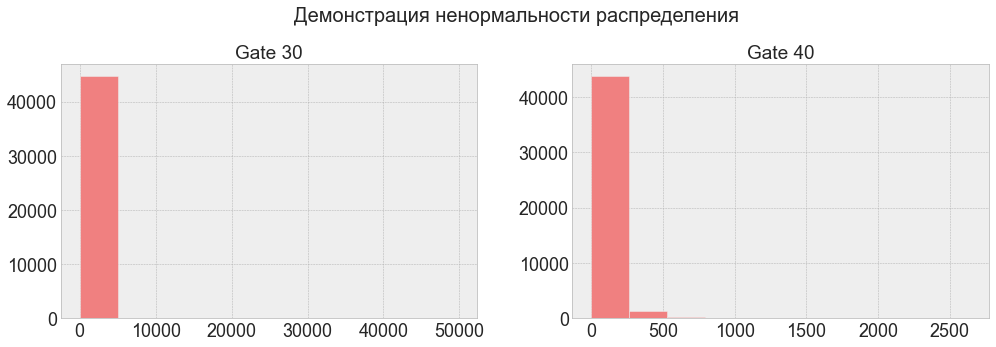

In [22]:
#Рассмотрим распределение данных выборок:

fig, ax = plt.subplots(1, 2, figsize = (14, 5))
fig.suptitle('Демонстрация ненормальности распределения', fontsize=20)
fig.tight_layout(h_pad=2.5, w_pad=3)

plt.rcParams['font.size'] = 18

ax[0].hist(x30, color='#F08080')
ax[0].set_title('Gate 30', fontsize=19)

ax[1].hist(x40, color='#F08080')
ax[1].set_title('Gate 40', fontsize=19)


#Как видно, распределения являются ненормальными.

Text(0.5, 1.0, 'Gate 40')

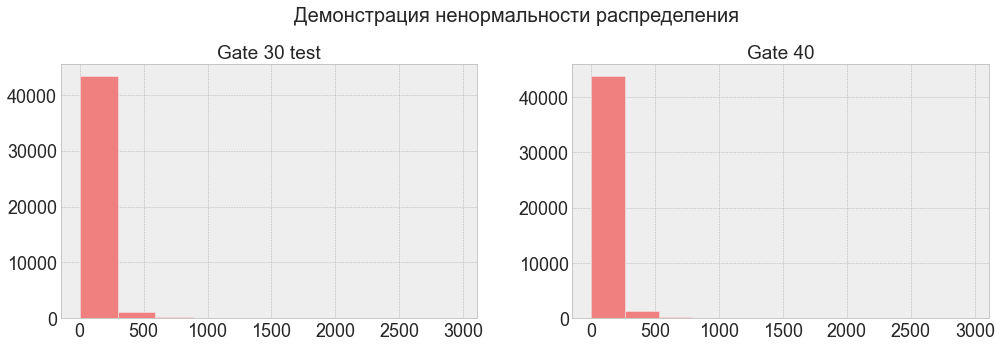

In [23]:
#У данных с воротами на 30 урвоне, есть очень большой выброс...
#Попробуем посмотреть на распределение этих данных без этого выброса:

x30_test = x30[x30 != max(x30)]

fig, ax = plt.subplots(1, 2, figsize = (14, 5), sharex=True)
fig.suptitle('Демонстрация ненормальности распределения', fontsize=20)
fig.tight_layout(h_pad=2.5, w_pad=3)

ax[0].hist(x30_test, color='#F08080')
ax[0].set_title('Gate 30 test', fontsize=19)

ax[1].hist(x40, color='#F08080')
ax[1].set_title('Gate 40', fontsize=19)


#Так картинка выглядит чуть понятнее

In [24]:
#Попробуем отфильтровать данные, чтобы приблизить их к нормальному распределнию
#Прологарифмируем признаки:
x30 = (x30.apply(lambda x: np.log(2*x**2) if x != 0 else np.nan)).dropna()
x40 = (x40.apply(lambda x: np.log(2*x**2) if x != 0 else np.nan)).dropna()

Text(0.5, 1.0, 'Gate 40')

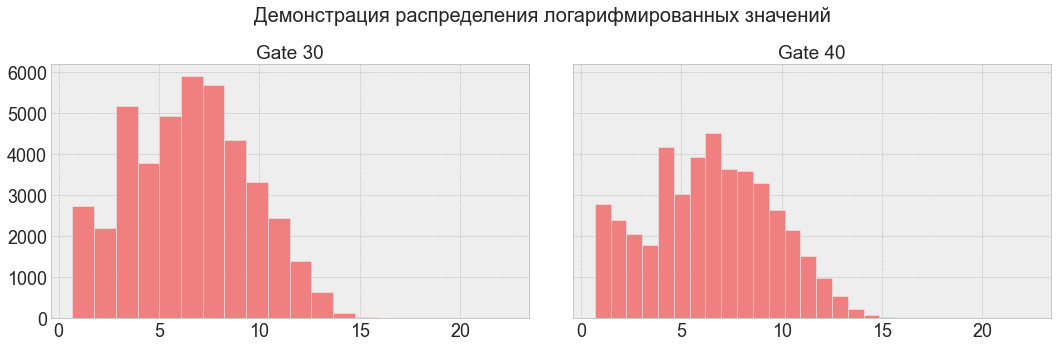

In [25]:

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex=True, sharey=True)
fig.suptitle('Демонстрация распределения логарифмированных значений', fontsize=20)
fig.tight_layout(h_pad=3)

ax[0].hist(x30, bins=20, color='#F08080')
ax[0].set_title('Gate 30', fontsize=19)

ax[1].hist(x40, bins=20, color='#F08080')
ax[1].set_title('Gate 40', fontsize=19)




<b> Теперь распределение больше напоминает нормальное, но погрешность все равно присутствует, поэтому итоговые результаты проверки гипотез будут неточными. </b>




Необходимо проверить гипотезу о средних на большой выборке. Данные по gate_40 и gate_30 не связаны между собой.  
Поскольку в задаче не дана информация по дисперсии ген. совокупности, то следует использовать t-test (ttest_ind) (для двух независимых выборок: проверка разницы средних двух выборок). 

Данные были отфильтрованы, чтобы как можно больше приблизиться к нормальному распределению.


Сформулируем гипотезы:

<b> Н0: μ1 = μ2. </b>  Среднее кол-во раундов в группах gate_40 и gate_30 НЕ отличается. т.е. равно. 

<b> Н1: μ1 != μ2. </b> Среднее кол-во раундов в группах gate_40 и gate_30 отличается. т.е. не равно.


In [26]:

t, pv = sc.stats.ttest_ind(x30, x40, alternative='two-sided')
t, pv 


(1.4429073544976891, 0.14905020507739208)



P-value = 0.14905020507739208, т.е. ~14.9%. 

Значит, что <b> на всех разумных уровнях значимости нулевая гипотеза НЕ отвергается </b>, т.к. вероятность ошибки первого рода слишком большая.

Получается, что на основе данных наблюдений нельзя сделать вывод о неравенстве средних кол-в пройденных уровней в группах gate_40 и gate_30. 

Т.е. расположение ворот не оказало влияния на кол-во проходимых уровней.




### Вопрос 3: Отличается ли медианное количество раундов в группах gate_40 и gate_30?



Поскольку речь о сравнении медианных значений в группах gate_40 и gate_30, которые независимы между собой.

Соответственно, воспользуемся Критерием Манна-Уитни.
Команда: mannwhitneyu().

Сформулируем гипотезы:

<b> Н0: Медианы выборок равны. </b>  

<b> Н1: Медианы выборок не равны. </b> 


https://www.reneshbedre.com/blog/mann-whitney-u-test.html

Использование Критерия Манна-Уитни для сравнения медиан уместно тогда, когда выборки имеют подобное распределение (https://www.reneshbedre.com/blog/mann-whitney-u-test.html). Как видно по графику, который был сделан в предыдущем задании, такое условие удовлетворяется. (на всякий случай, продублирую график ниже).

Text(0.5, 1.0, 'Gate 40')

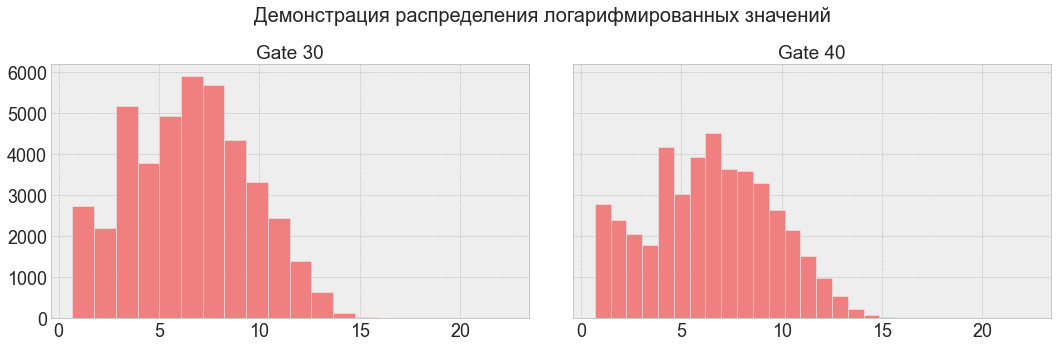

In [27]:

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex=True, sharey=True)
fig.suptitle('Демонстрация распределения логарифмированных значений', fontsize=20)
fig.tight_layout(h_pad=3)

ax[0].hist(x30, bins=20, color='#F08080')
ax[0].set_title('Gate 30', fontsize=19)

ax[1].hist(x40, bins=20, color='#F08080')
ax[1].set_title('Gate 40', fontsize=19)



In [28]:
#Стоит отметить, что медианы и средние значения выборок очень близки:

#x30.describe() #Вывод: (mean = 6.472644, median = 6.473891);
#x40.describe() #Вывод: (mean = 6.442233, median = 6.473891); 


Получается, что, если медиана и среднее значение в рамках каждой выборки приблизительно равны, то результаты сравнения медиан приблизительно <=> результатам сравнения средних.

В предыдущем задании была такая же выборка, и так же двустороняя гипотеза, как и здесь, соответственно, результат проверки данной гипотезы, скорее всего, будет о Неотвержении нулевой гипотезы.

In [29]:
#Проверим, используя тест:

sc.stats.mannwhitneyu(x30, x40, alternative='two-sided')



MannwhitneyuResult(statistic=934375555.0, pvalue=0.11628458958498972)



P-value = 0.11628458958498972, т.е. ~11.62%.

Значит, что <b> на всех разумных уровнях значимости нулевая гипотеза (Н0) НЕ отвергается </b>, т.е. на основе имеющихся наблюдений нельзя сделать вывод, что медианы кол-в раундов групп gate_30 и gate_40 отличаются. 

Расположение ворот не влияет на медианное кол-во уровней, пройденных пользователями.





------------

## Задача 4.

В данной задаче будет необходимо проанализировать различные характеристики покемонов и сравнить их между собой

"Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex."

### Описание данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* pid: Numeric - ID покемона
* HP: Numeric - Очки здоровья
* Attack: Numeric - Сила обычной атаки
* Defense: Numeric - Сила обычной защиты
* Sp. Atk: Numeric - Сила специальной атаки
* Sp. Def: Numeric - Сила специальной защиты
* Speed: Numeric - Скорость движений
* Legendary: Boolean - «True», если покемон редкий
* Class 1: Categorical - Класс покемона
* Class 2: Categorical - Класс покемона

In [30]:
po.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [31]:
po.shape

(800, 11)

In [32]:
po.head(15)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


In [33]:
po.isnull().sum()

#Были обнаружены выбросы по категор. переменной.
#Но по условию задачи, эта переменная предсиавляет собой дополнительный класс покемона, которого может и не быть.
#То есть никаких действий с пропусками делать не нужно.


pid            0
Name           1
Class 1        0
Class 2      386
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
dtype: int64

In [34]:
#Перед выполнением заданий, поменяю названия на более удобные.

po = po.rename(columns={'Class 1': 'c1', 'Class 2': 'c2', 'Legendary': 'Lg'}) 
po



,pid,Name,c1,c2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Lg
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


### Вопрос 1

Подозревается, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`.
Проверим правда ли это:

<b> В условии сказано, что предоставлена информацию о ВСЕХ СУЩЕСТВУЮЩИХ покемонах, т.е. мы имеем дело с ген. совокупностью. </b>

In [35]:
pd.set_option('display.max_rows', 136)

po[['c1', 'c2']].value_counts() #Просто посмотреть на наборы

#Как видно, классы grass и rock могут встречаться как в с1, так и в с2. 

c1        c2      
Normal    Flying      24
Grass     Poison      15
Bug       Flying      14
          Poison      12
Ghost     Grass       10
Water     Ground      10
Steel     Psychic      7
Fire      Fighting     7
Water     Flying       7
Bug       Steel        7
Psychic   Flying       6
          Fairy        6
Water     Dark         6
Rock      Ground       6
Dragon    Flying       6
Fire      Flying       6
Rock      Water        6
Bug       Grass        6
Dragon    Ground       5
Electric  Flying       5
Normal    Fairy        5
Dark      Flying       5
Water     Psychic      5
Grass     Flying       5
Ghost     Poison       4
Steel     Ghost        4
Water     Rock         4
Rock      Flying       4
Dragon    Psychic      4
Ground    Flying       4
Grass     Dark         3
          Ice          3
Fire      Ground       3
Poison    Flying       3
Rock      Fairy        3
Ghost     Fire         3
Psychic   Fighting     3
Fighting  Psychic      3
Ground    Rock         3
      

In [36]:
#Выделим необходимые выборки:

pg, pr = po.loc[((po.c1 == 'Grass') | (po.c2 == 'Grass'))], po.loc[((po.c1 == 'Rock') | (po.c2 == 'Rock'))]

#Получили датафреймы, где классы либо Grass(pg), либо Rock(pr).


Text(0.5, 1.0, 'Rock')

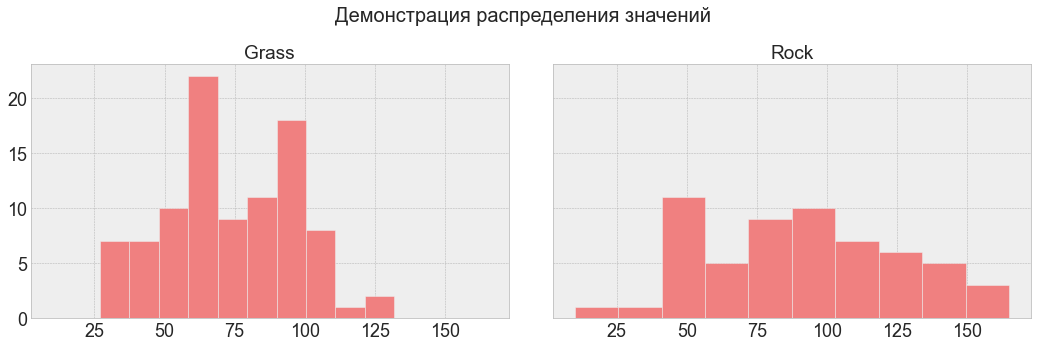

In [37]:
#Поскольку в задаче нас интересует параметрика, то проверим на нормальность распределения:

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex=True, sharey=True)
fig.suptitle('Демонстрация распределения значений', fontsize=20)
fig.tight_layout(h_pad=3)


ax[0].hist(pg['Attack'], color='#F08080')
ax[0].set_title('Grass', fontsize=19)

ax[1].hist(pr['Attack'], color='#F08080')
ax[1].set_title('Rock', fontsize=19)



<b> Как видно, распределения не совсем напоминают нормальные, далее попробуем отфильтровать данные: </b>

Text(0.5, 1.0, 'Rock')

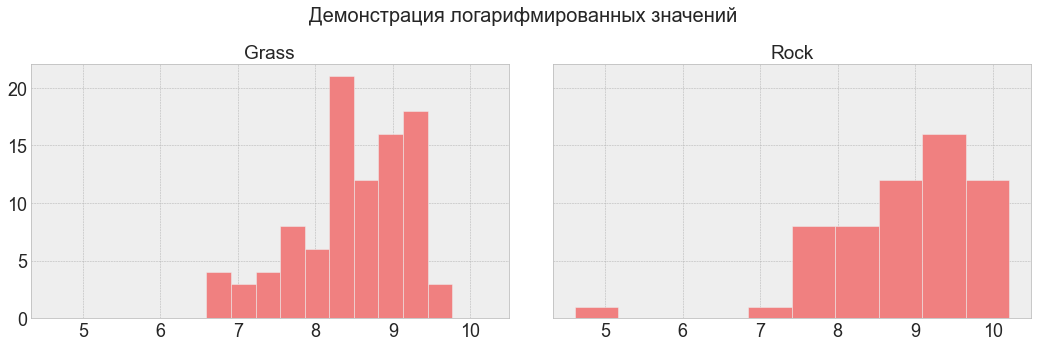

In [54]:
#Восопльзуемся все той же функцией:

#Прологарифмируем признаки:
pgl, prl = pg.copy(), pr.copy()

pgl['Attack'] = (pg['Attack'].apply(lambda x: np.log(x**2) if x != 0 else np.nan)).dropna()
prl['Attack'] = (pr['Attack'].apply(lambda x: np.log(x**2) if x != 0 else np.nan)).dropna()

#pg #pr

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex=True, sharey=True)
fig.suptitle('Демонстрация логарифмированных значений', fontsize=20)
fig.tight_layout(h_pad=3)


ax[0].hist(pgl['Attack'], color='#F08080')
ax[0].set_title('Grass', fontsize=19)

ax[1].hist(prl['Attack'], color='#F08080')
ax[1].set_title('Rock', fontsize=19) 



<b> Как видно, фильтрация данных не помогла, тогда остается либо использовать начальные данные (они больше напоминают нормальное распределение, чем логарифмированные), зная, что результаты будут довольно неточными. </b>

<b> Либо попытаться рассмотреть гипотезы о средних, через непараметрику и аппроксимацию. </b>

(Попробуем второй сценарий).

In [39]:
#Оценим данные:

#pr.Attack.describe() #Вывод:(mean: 90.724138, median: 90.000000);
#pg.Attack.describe() #Вывод:(mean: 73.463158, median: 70.000000);


Получается, что в рамках каждой выборки, значения медиан и средних очень-очень близки, поэтому можно воспользоваться Критерием Манна-Уитни о гипотезе о медианах, результат которого будет очень похож на результат гипотезы о средних. (Т.е. такой сценарий, скорее всего, даст более точные результаты, чем тест о средних на начальных данных).

Команда: mannwhitneyu()

Сформулируем гипотезы о медианах:

<b> Н0: Медианные обычные атаки покемонов класса Grass и покемонов класса Rock равны. </b> (примерно <=> Покемоны класса Grass в среднем имеют такую же обычную атаку, как и покемоны класса Rock);

<b> Н1: Медианные обычные атаки покемонов класса Grass больше медианных атак покемонов класса Rock. </b> (примерно <=> Покемоны класса Grass в среднем имеют более сильную обычную атаку, чем покемоны класса Rock); 


In [40]:

sc.stats.mannwhitneyu(pg['Attack'],
                      pr['Attack'],
                      alternative='greater')



MannwhitneyuResult(statistic=1963.5, pvalue=0.9985586984080945)


P-value = 0.9985586984080945, т.е. ~99.8%.

Значит, что <b> на всех разумных уровнях значимости нулевая гипотеза (Н0) НЕ отвергается, а Принимается, поскольку мы имее дело с ген. совокупностью (так сказано в задании и я писал об этом выше) </b>, 

т.е. можно сказать, что Медианные значения обычных атак покемонов двух классов (Grass & Rock) эквивалентны, а также, что почти точно (при условии, что медианы и средние значения практически равны): Среднее обычных атак покемонов класса Grass равно средней обычной атаке покемонов класса Rock.




### Вопрос 2

Правда ли нет значимой разницы между силой обычной атаки и силой обычной защиты у покемонов.

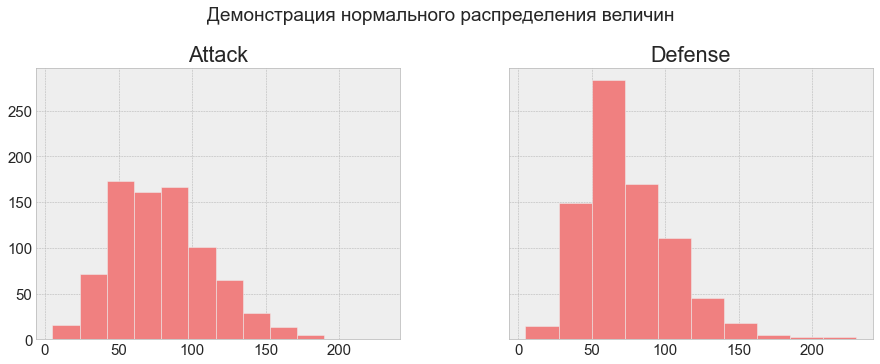

In [109]:
#Попробуем рассмотреть распределения Атаки и Защиты:

po[['Attack', 'Defense']].hist(figsize=(15, 5), sharex=True, sharey=True, color='#F08080')
plt.rcParams['font.size'] = 16
plt.suptitle('Демонстрация нормального распределения величин', fontsize=19, y = 1.05)
fig.tight_layout(h_pad=2)


#Распределены нормально / (sc.stats.normaltest(po[['Attack', 'Defense']]) - так можно сделать доп. проверку)

In [104]:
po[['Attack', 'Defense']].corr()

#Корреляция = 0.438687, т.е. связь слабая

,Attack,Defense
Attack,1.000000,0.438687
Defense,0.438687,1.000000



С т.ч. задания, у нас ген. совокупность, нормальное распределение, выборки независимы. Необходимо рассмотреть гипотезу о средних.

Команда: ztest()

Сформулируем гипотезы о средних:

<b> Н0: μ1 = μ2. </b> Значимой разницы в обычных атаках и обычных защитах нет;

<b> Н1: μ1 != μ2. </b> Значимая разница в обычных атаках и обычных защитах есть; 



In [105]:

ztest(po.Attack, po.Defense, alternative='two-sided')



(3.2417640740423126, 0.001187923197909001)


P-value = 0.001187923197909001, т.е. ~0.1%.

Значит, что <b> на всех разумных уровнях значимости нулевая гипотеза (Н0) отвергается и принимается альтернативная гипотеза (Н1) </b>, 

т.е. можно сказать, что Значимая разница в обычных атаках и в обычных защитах есть.



### Вопрос 3

Правда ли, что средняя скорость покемонов превышает 66.6? Сформулируем подходящие гипотезы и ответим на вопрос:

Text(0.5, 0.98, 'Распределение скорости покемонов')

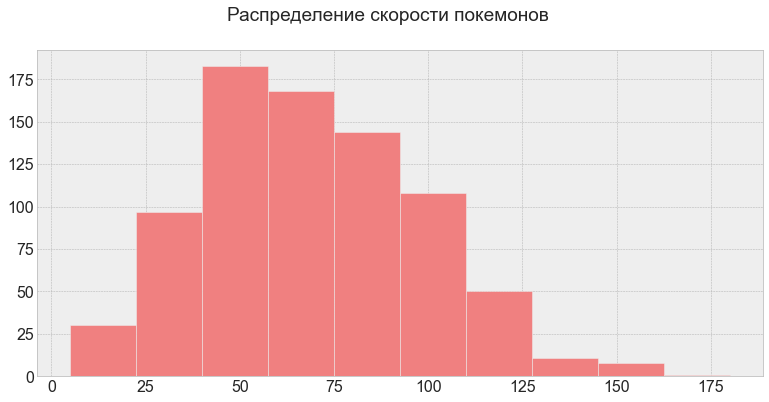

In [112]:
#Проверка на нормальность распределения:

po.Speed.hist(figsize=(13, 6), color='#F08080')
plt.suptitle('Распределение скорости покемонов', fontsize=19)

#Распределение нормально /(sc.stats.normaltest(po.Speed) - так можно сделать доп. проверку на норм. распрдл.)


С т.ч. задания, у нас ген. совокупность, ~нормальное распределение. Необходимо рассмотреть гипотезу о среднем значении.

Команда: ztest()

Сформулируем гипотезы о средних:

<b> Н0: Средняя скорость покемонов равна 66.6; </b>

<b> Н1: Средняя скорость покемонов больше, чем 66.6; </b>



In [114]:

ztest(po.Speed, value = 66.6, alternative='larger')



(1.6326941356636653, 0.05126667071552446)


P-value = 0.05126667071552446, т.е. ~5.1%.

Значит, что:

1) <b> на уровне значимости 10% нулевая гипотеза (Н0) отвергается и принимается альтернативная гипотеза (Н1) </b> 
т.е. можно сказать, что Средняя скорость покемонов больше, чем 66,6.

2) <b> на уровнях значимости 1% и 5% нулевая гипотеза (Н0) НЕ отвергается, а принимается </b> 
т.е. можно сказать, что Средняя скорость покемонов равна 66,6.



---